# Introduction
The following four topics will be discussed

- Financial Data
  -  data import
  -  summary statistics
  -  resampling
-  Rolling Statistics
  -  moving average
  
- Correlation Analysis
  - S&P 500 index and Vix relationship
  
- High Frequency data

In [1]:
!pip install finance-datareader
import FinanceDataReader as fdr

## Data import: from yahoo finance 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
#data = pdr.get_data_yahoo(tickers, start = '2010-1-01', end = dt.now(), group_by='ticker')
data = fdr.DataReader('000150', '2018-01-01', end = dt.now())

In [ ]:
new_tickers =['005930','000660','068270','207940']

In [ ]:
data_close = pd.DataFrame()
for ticker in new_tickers:
    data_close[ticker] = fdr.DataReader(ticker, '2018-01-01', end = dt.now())['Close']

data_close.index = pd.to_datetime(data.index)

In [ ]:
# upload as  object 

for i, ticker in enumerate(tickers):
    globals()[new_tickers[i]] = pd.read_csv("c:/python/data/pff/{}.csv".format(ticker))
    
   
# from now just type ticker name(JPY, AAPL) you may proceed to the next step

In [ ]:
# want get data composed of 'Adj.close' from csv file

data_close = pd.DataFrame()

for ticker in new_tickers:
    data_close[ticker] = globals()[ticker]['Adj Close']

data_close.index = pd.to_datetime(AAPL.Date )

In [ ]:
data_close.head()

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
Date,,,,,,,,,,,,
2009-12-31,20.301006,134.520004,43.726997,107.309998,151.107407,15.540120,92.910004,24.544783,93.934990,1115.099976,21.680000,168.250000
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,92.919998,NaN,NaN,NaN,NaN,NaN
2010-01-04,20.616993,133.899994,45.146393,109.800003,154.902115,15.905768,92.495003,24.923265,95.528107,1132.989990,20.040001,174.020004
2010-01-05,20.652637,134.690002,45.581676,109.699997,157.640747,15.898150,91.584999,24.931318,95.780975,1136.520020,19.350000,176.020004
2010-01-06,20.324135,132.250000,46.688808,111.510002,155.958191,15.844827,92.356003,24.778313,95.848396,1137.140015,19.160000,180.759995


In [ ]:
# save for later use

data_close.to_csv("c:/python/data/pff/data_close.csv")

# Preliminary Analysis


## Basic Statistics 

In [ ]:
data_close = data_close.dropna()
data_close.describe()
#data_close.describe().round(2)

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
count,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000
mean,83.924127,491.431762,32.273403,129.865992,162.968791,26.611060,99.850889,41.778574,168.719442,1811.710110,16.987149,120.466226
std,46.715427,390.703053,14.163914,18.882639,45.442523,9.634587,14.710026,21.572070,53.570890,490.549289,5.748039,53.298694
min,18.501446,108.610001,12.334537,100.500000,80.020607,13.767100,75.739998,18.700027,87.388954,1027.369995,9.140000,38.840000
25%,44.697292,213.210007,21.774321,117.029999,136.174988,18.379856,83.765999,23.975983,117.068924,1339.219971,13.090000,81.110001
50%,69.494110,324.500000,24.815948,123.639999,154.437378,23.332178,102.147003,35.902424,171.804382,1866.520020,15.600000,93.720001
75%,113.637253,713.229980,45.685764,138.369995,185.639023,32.781837,112.244003,51.989182,200.073227,2111.729980,19.049999,171.850006
max,203.419998,1863.609985,63.475121,184.589996,272.416687,57.029999,125.070000,110.830002,284.160797,2872.870117,48.000000,228.759995


In [ ]:
data_close.quantile(q=0.5)

AAPL      69.494110
AMZN     324.500000
GDX       24.815948
GLD      123.639999
GS       154.437378
INTC      23.332178
JPY      102.147003
MSFT      35.902424
SPY      171.804382
GSPC    1866.520020
VIX       15.600000
XAU       93.720001
Name: 0.5, dtype: float64

## Plotting 

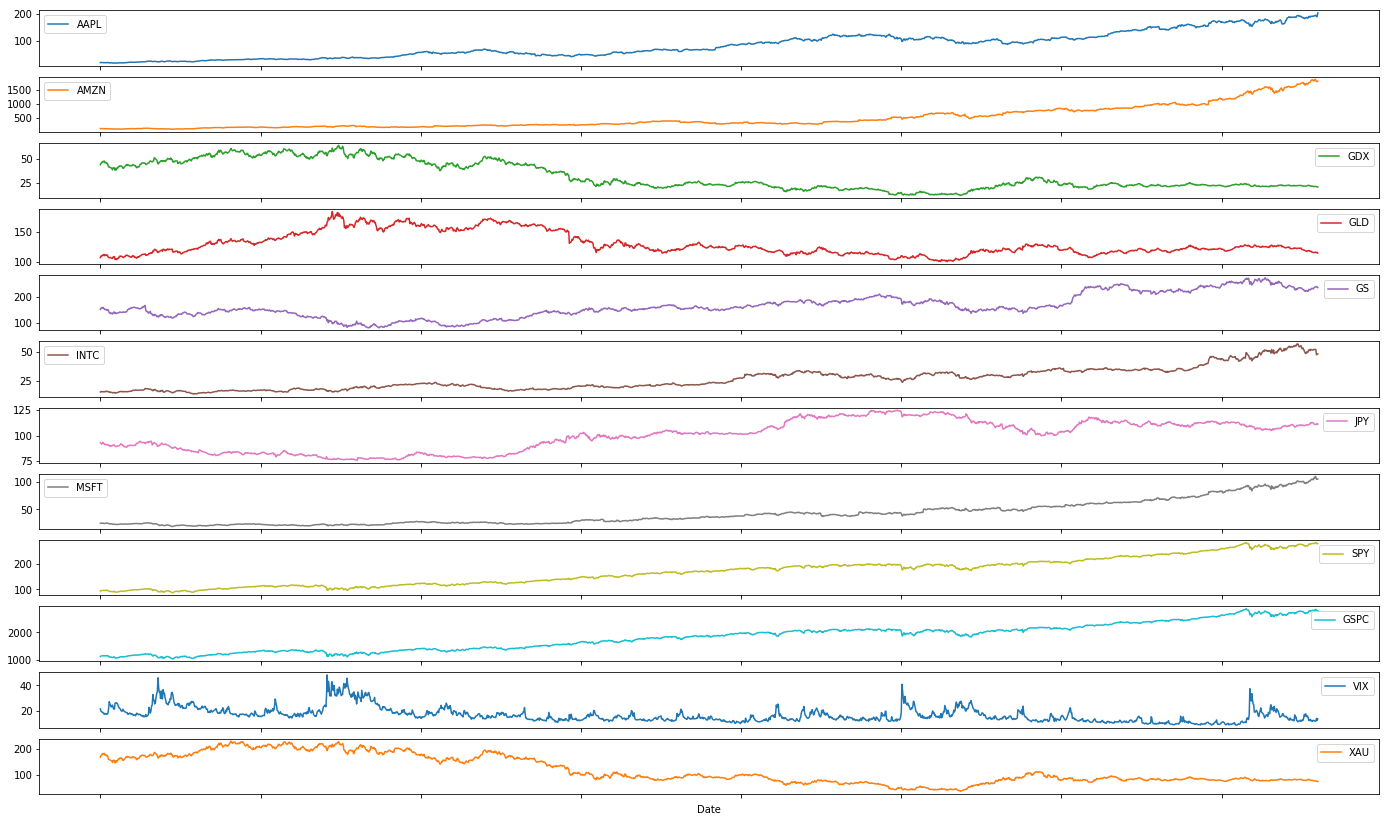

In [ ]:
#data_close.plot()
data_close.plot(subplots=True, figsize=(24,16))
plt.show()

## Rate of return related

In [ ]:
# percentage return

data_close.pct_change().dropna().head()

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
Date,,,,,,,,,,,,
2010-01-04,0.015565,-0.004609,0.032460,0.023204,0.025113,0.023529,-0.004467,0.015420,0.016960,0.016043,-0.075646,0.034294
2010-01-05,0.001729,0.005900,0.009642,-0.000911,0.017680,-0.000479,-0.009838,0.000323,0.002647,0.003116,-0.034431,0.011493
2010-01-06,-0.015906,-0.018116,0.024289,0.016500,-0.010673,-0.003354,0.008418,-0.006137,0.000704,0.000546,-0.009819,0.026929
2010-01-07,-0.001849,-0.017013,-0.004864,-0.006188,0.019568,-0.009616,0.011196,-0.010400,0.004221,0.004001,-0.005219,-0.008575
2010-01-08,0.006648,0.027077,0.015071,0.004963,-0.018911,0.011165,-0.007817,0.006897,0.003328,0.002882,-0.048793,0.014118


In [ ]:
# log return

np.log(data_close/data_close.shift(1)).dropna().head()

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
Date,,,,,,,,,,,,
2010-01-04,0.015445,-0.004620,0.031945,0.022939,0.024803,0.023257,-0.004477,0.015302,0.016818,0.015916,-0.078660,0.033719
2010-01-05,0.001727,0.005883,0.009595,-0.000911,0.017525,-0.000479,-0.009887,0.000323,0.002644,0.003111,-0.035038,0.011427
2010-01-06,-0.016034,-0.018282,0.023999,0.016365,-0.010731,-0.003360,0.008383,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001850,-0.017160,-0.004876,-0.006207,0.019379,-0.009662,0.011134,-0.010454,0.004213,0.003993,-0.005233,-0.008612
2010-01-08,0.006626,0.026717,0.014959,0.004951,-0.019093,0.011103,-0.007847,0.006873,0.003322,0.002878,-0.050024,0.014019


In [ ]:
# differnce

data_close.diff().dropna().head()

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
Date,,,,,,,,,,,,
2010-01-04,0.315987,-0.620010,1.419396,2.490005,3.794708,0.365648,-0.415001,0.378482,1.593117,17.890014,-1.639999,5.770004
2010-01-05,0.035644,0.790008,0.435283,-0.100006,2.738632,-0.007618,-0.910004,0.008053,0.252868,3.530030,-0.690001,2.000000
2010-01-06,-0.328502,-2.440002,1.107132,1.810005,-1.682556,-0.053323,0.771004,-0.153005,0.067421,0.619995,-0.190000,4.739991
2010-01-07,-0.037575,-2.250000,-0.227100,-0.690002,3.051865,-0.152356,1.033996,-0.257691,0.404618,4.549926,-0.100001,-1.549988
2010-01-08,0.134867,3.520004,0.700234,0.550003,-3.007111,0.175208,-0.729995,0.169108,0.320297,3.290039,-0.930000,2.529998


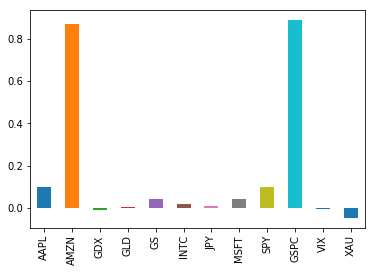

In [ ]:
# plot difference mean histogram

data_close.diff().dropna().mean().plot(kind='bar');

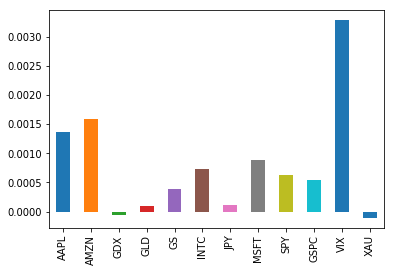

In [ ]:
data_close.pct_change().dropna().mean().plot(kind='bar');

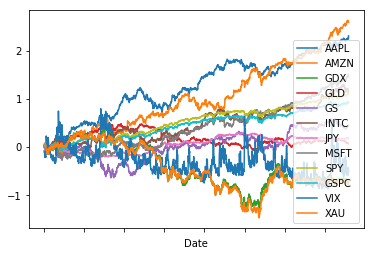

In [ ]:
ret = np.log(data_close/data_close.shift(1)).dropna()
ret.cumsum().plot()

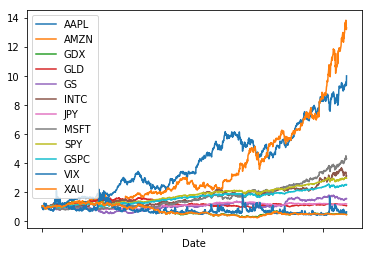

In [ ]:
ret.cumsum().apply(np.exp).plot()   # why exp?

**Cumulative return**
\begin{align*}
\exp\left[log \left(\ 1+ \frac{p_t - p_{t-1}}{p_{t-1}}    \right).cumsum  \right] -1
\end{align*}  

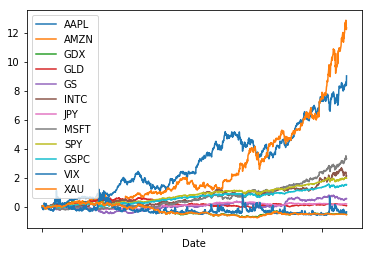

In [ ]:
ret = data_close.pct_change()
cum_ret = np.exp(np.log(1+ret).cumsum())-1 
cum_ret.plot()

# Resampling

In [ ]:
data_close.resample('1w', label='right').first().head()

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
Date,,,,,,,,,,,,
2010-01-03,20.301006,134.520004,43.726997,107.309998,151.107407,15.540120,92.910004,24.544783,93.934990,1115.099976,21.680000,168.250000
2010-01-10,20.616993,133.899994,45.146393,109.800003,154.902115,15.905768,92.495003,24.923265,95.528107,1132.989990,20.040001,174.020004
2010-01-17,20.241280,130.309998,47.474209,112.849998,153.541779,15.959097,92.092003,24.375685,96.708183,1146.979980,17.549999,182.619995
2010-01-24,20.716223,127.610001,45.127468,111.519997,149.335373,16.035273,90.705002,25.044058,96.986351,1150.229980,17.580000,173.899994
2010-01-31,19.563074,120.309998,40.869274,107.480003,138.703064,15.479178,90.415001,23.610674,92.527298,1096.780029,25.410000,157.240005


In [ ]:
data_close.resample('1w', label='right').last().head()

,AAPL,AMZN,GDX,GLD,GS,INTC,JPY,MSFT,SPY,GSPC,VIX,XAU
Date,,,,,,,,,,,,
2010-01-03,20.301006,134.520004,43.726997,107.309998,151.107407,15.540120,92.919998,24.544783,93.934990,1115.099976,21.680000,168.250000
2010-01-10,20.421427,133.520004,47.161942,111.370003,156.002945,15.867679,92.660004,24.689730,96.573311,1144.979980,18.129999,181.740005
2010-01-17,19.838593,127.139999,44.871975,110.860001,147.858658,15.844827,90.750000,24.850792,95.789398,1136.030029,17.910000,172.779999
2010-01-24,19.050560,121.430000,41.437027,107.169998,137.933380,15.166850,89.809998,23.320772,92.055275,1091.760010,27.309999,158.779999
2010-01-31,18.502411,125.410004,38.531990,105.959999,133.100510,14.778345,90.269997,22.692654,90.521149,1073.869995,24.620001,147.929993


In [ ]:
data_close.index.weekday

Int64Index([3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
            ...
            0, 1, 2, 3, 4, 6, 0, 1, 2, 3],
           dtype='int64', name='Date', length=2496)

In [ ]:
ts.resample(rule='24H', closed='left', label='left', base=17).sum()
ts.resample('D').interpolate()[::7]   # weekday 
ts.resample('B'): business day
df.index = pd.to_datetime(df.index)
df.set_index(df.index.to_period('Q')).groupby(level=0).mean()
data_close.index.weekday

##closed='left', label='left'
##"take the first value from the left-closed interval, and labeled with the date from the left end of the interval"
## last: take the last value  the nearby week date
## first: take the first value of the nearby week date

In [5]:
data_close.resample( 'M').last().head()

,005930,000660,068270,207940
Date,,,,
2018-01-31,49900,73500,315700,438500
2018-02-28,47060,76800,331251,450000
2018-03-31,49220,81300,290431,487000
2018-04-30,53000,84500,254304,488000
2018-05-31,50700,93400,249142,435000


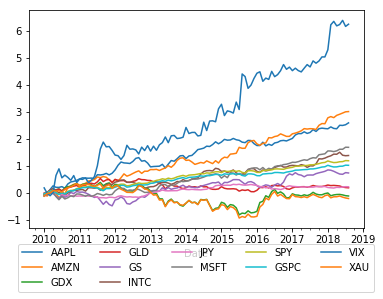

In [ ]:
#ret.index = pd.to_datetime(ret.index)

ax = ret.cumsum().resample('m').last().plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)
#ax.legend(loc='center left')

#ret.cumsum().resample('m').last().plot(figsize=(16,9))

# Rolling Statistics 

In [ ]:
df = pd.DataFrame(AAPL['Adj Close'])
df.index = pd.to_datetime(AAPL.Date)
df.columns = ['close']
df = df.dropna()

In [ ]:
df

,close,min
Date,,
2009-12-31,20.301006,NaN
2010-01-04,20.616993,NaN
2010-01-05,20.652637,NaN
2010-01-06,20.324135,NaN
2010-01-07,20.286560,NaN
2010-01-08,20.421427,NaN
2010-01-11,20.241280,NaN
2010-01-12,20.011040,NaN
2010-01-13,20.293304,NaN


In [ ]:
#df['min'] = df.rolling(window=20).min()
#df['max'] = df.rolling(window=20).max()
df['mean'] = df.rolling(window=20).mean()

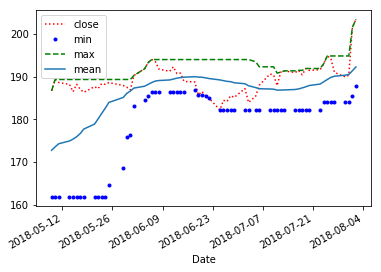

In [ ]:
df[-60:].plot(style=['r:', 'b.','g--']) 

In [ ]:
df2 = AAPL['Adj Close'].copy()
df2 = pd.DataFrame(df2)
df2.index =  pd.to_datetime(AAPL.Date)
df2.columns = ['close']
df2 = df2.dropna()

In [ ]:
df2['sma20'] = df2.rolling(20).mean()
df2['sma60'] = df2.rolling(60).mean()   # strange?  bug?

In [ ]:
df2['position'] = list(map(lambda x,y: [-1,1][x>y], df2['sma20'], df2['sma60']))
df2['position2'] = np.where(df2['sma20']>df2['sma60'], 1, -1)

<IPython.core.display.Javascript object>


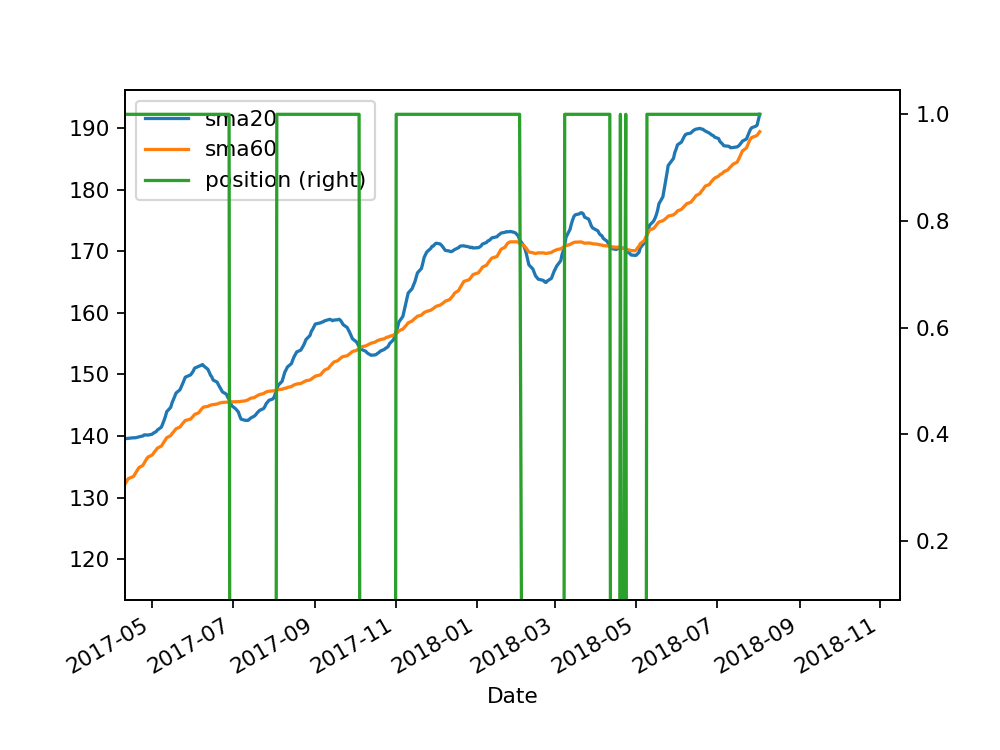

In [ ]:
%matplotlib notebook  
df2[['sma20', 'sma60', 'position']].plot(secondary_y = 'position')

# Correlation Analysis

In [ ]:
data_index = data_close[['GSPC', 'VIX']]
data_index = data_index.dropna()
data_index.head()

,GSPC,VIX
Date,,
2009-12-31,1115.099976,21.680000
2010-01-04,1132.989990,20.040001
2010-01-05,1136.520020,19.350000
2010-01-06,1137.140015,19.160000
2010-01-07,1141.689941,19.059999


<IPython.core.display.Javascript object>


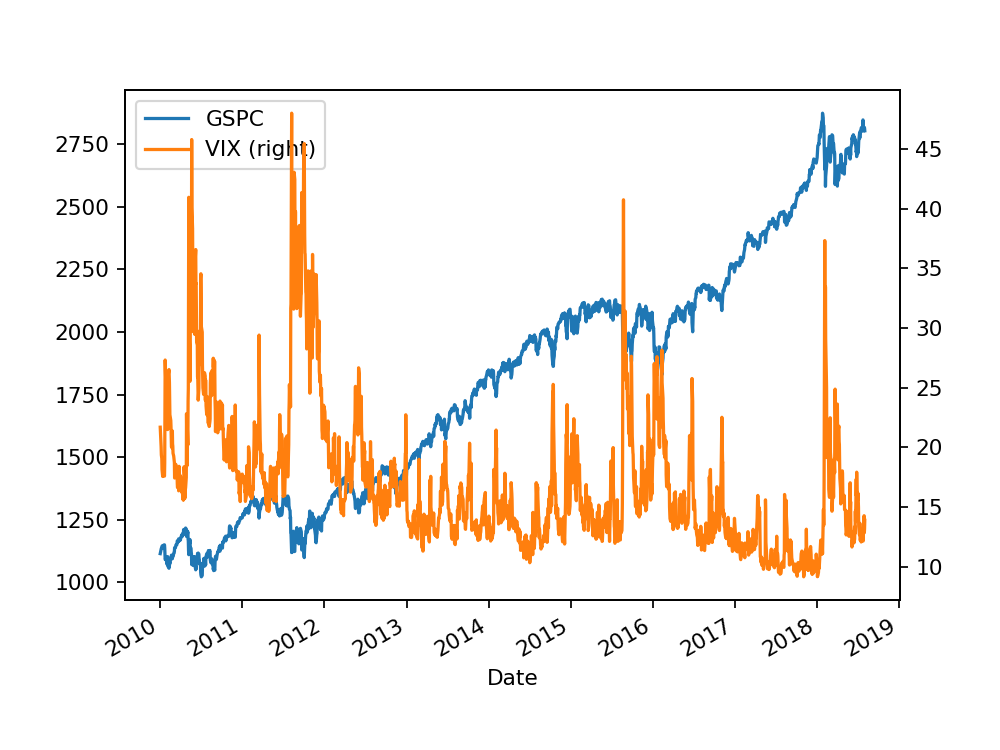

In [ ]:
data_index.plot(secondary_y='VIX')

In [ ]:
ret_index = data_index.pct_change()
ret_index = ret_index.dropna()

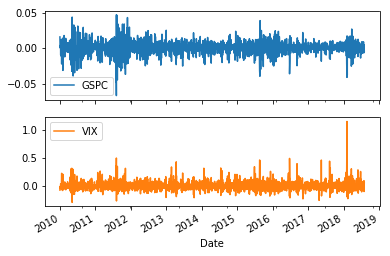

In [ ]:
%matplotlib inline 

ret_index.plot(subplots=True); 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002423087F8D0>,
      dtype=object)

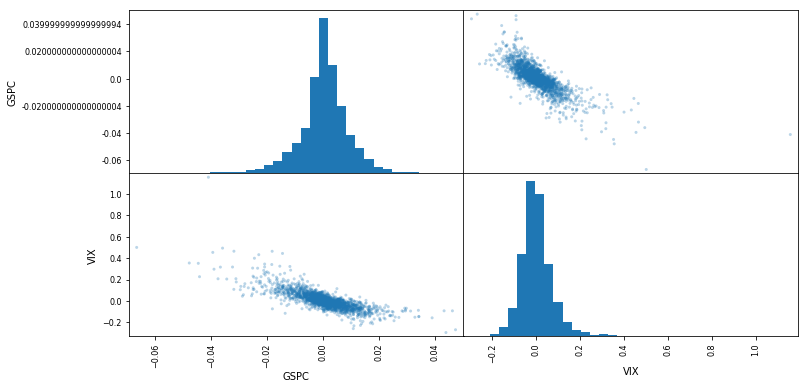

In [ ]:
pd.plotting.scatter_matrix(ret_index, diagonal='hist', figsize=(12,6), hist_kwds={'bins': 35}, alpha=0.3);

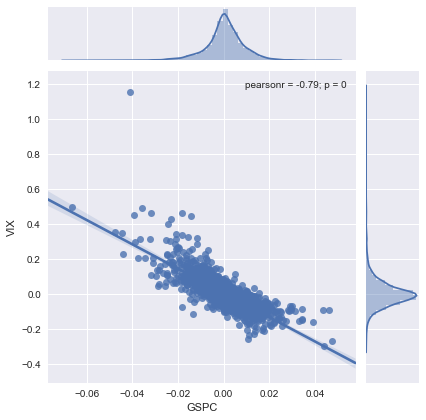

In [ ]:
import seaborn as sns;  sns.set()

sns.jointplot('GSPC', 'VIX', data = ret_index, kind='reg')

In [ ]:
rets_corr = ret_index.corr()
rets_corr

,GSPC,VIX
GSPC,1.000000,-0.789798
VIX,-0.789798,1.000000


In [ ]:
ax= ret_index['GSPC'].rolling(window=252).corr(ret_index['VIX']).plot()
#ax.axvline(rets_corr.iloc[0,1])
ax.axhline(y=-0.78, c='r', ls='--')

NameError: name 'ret_index' is not defined

## ARCH/GARCH Model
- variance is the weighted average of the past squared forecasting errors

- GARCH
\begin{align*}
 p_t &= p_{t-1} + \epsilon_t \\
 r_t &= \mu + \epsilon_t ~~  \epsilon_t\sim N(0, \sigma^2_t), \epsilon_t = \sigma_t \cdot N(0,1) \\
&\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2  + \beta \sigma_{t-1}^2,  \text{where}~~ \omega, \alpha, \beta \ge0, 
                 \alpha +\beta <1
\end{align*}

- ARCH
\begin{align*}
\sigma_t^2 = \omega + \sum_{i=1}^{L} \alpha_i \epsilon_{t-i}^2  
\end{align*}

### Data and Volatility

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_csv("c:/python/data/pff/data_close.csv")
data.set_index('Date', inplace=True)
data = data.dropna()
ret = data.pct_change()
ret = ret.dropna()

Text(700,-0.123558,'2013-01-24: due to iphon sales')

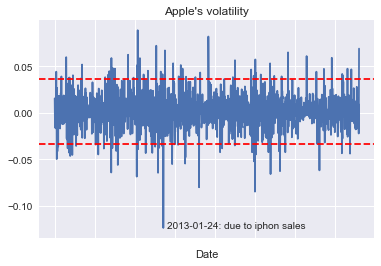

In [ ]:
ret.AAPL.plot()
lline = ret.AAPL.mean() - 2. * ret.AAPL.std()
uline = ret.AAPL.mean() +  2. * ret.AAPL.std()
plt.axhline(lline, c='r', ls='--')
plt.axhline(uline, c='r', ls='--')
plt.title("Apple's volatility")
plt.annotate('2013-01-24: due to iphon sales', ([700,ret.AAPL.iloc[678]]))

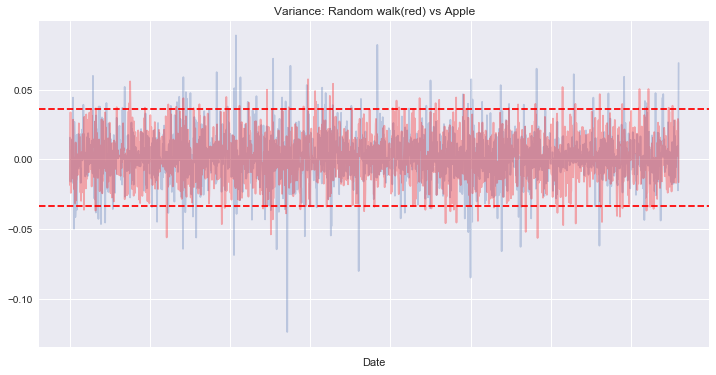

In [ ]:
mock = np.random.normal(loc = np.mean(ret.AAPL), scale = np.std(ret.AAPL), size=len(ret.AAPL))
mock = pd.Series(mock, index=ret.AAPL.index)
ret.AAPL.plot(figsize=(12, 6), alpha=0.3)
mock.plot(c='r', alpha=0.3)
plt.axhline(lline, c='r', ls='--')
plt.axhline(uline, c='r', ls='--')
plt.title('Variance: Random walk(red) vs Apple');

### ARCH/GARCH Estimation

In [ ]:
ret = pd.DataFrame(ret.AAPL)

In [ ]:
import pyflux as pf
model = pf.GARCH(ret, p=1, q=1)

In [ ]:
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: AAPL                                Method: MLE                                       
Start Date: 2010-01-05                                  Log Likelihood: 5053.8719                         
End Date: 2018-08-02                                    AIC: -10099.7438                                  
Number of observations: 1899                            BIC: -10077.5474                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 